In [1]:
path = "/results/"

# Colors

In [2]:
colors = [['#7f2704', '#a50f15', '#de2d26', '#fb6a4a', '#ff005d', '#fcbba1'], 
          ['#000000', '#464b52', '#3d6085', '#3f7eb5', '#3ca5e8', '#79e8ff']]

# Functions

### Functions for preprocessing & ploting

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import math

In [4]:
def preprocess( path,  ):
    # preprocess the files with the results and extract plotting information
    num_ratios = 6
    throughputs = np.genfromtxt(path, delimiter = ',')
    
    # Compute frontier
    frontier_idx = [];
    drop = 0;
    for i in range(0, len(throughputs)):
        for j in range(0, len(throughputs)):
            if((i != j) and (throughputs[i][0] <= throughputs[j][0]) and (throughputs[i][1] <= throughputs[j][1])):
                drop = 1;
        if(drop == 0):
            frontier_idx.append(i)
        else:
            drop = 0;
    frontier_len = len(frontier_idx)
    frontier = np.empty([2, frontier_len])
    for i in range(0, frontier_len):
        frontier[0][i] = throughputs[frontier_idx[i]][0]
        frontier[1][i] = throughputs[frontier_idx[i]][1]
    idx = np.argsort(frontier[0])
    
    # Vertical Lines - Fixed T
    district_tc = int(len(throughputs)/num_ratios)  # number of different T clients 
    district_ac = num_ratios  # number of different A clients
    tt_v = np.empty([district_tc, district_ac])
    ta_v = np.empty([district_tc, district_ac])
    for i in range(0, district_tc):
        for j in range(0, district_ac):
            tt_v[i][j] = throughputs[i* district_ac + j][0]
            ta_v[i][j] = throughputs[i* district_ac + j][1]
            
    # Horizontal Lines - Fixed A
    district_tc = int(len(throughputs)/num_ratios)  # number of different T clients 
    district_ac = num_ratios  # number of different A clients
    ta_h = np.empty([district_ac, district_tc])
    tt_h = np.empty([district_ac, district_tc])
    for i in range(0, district_ac):
        for j in range(0, district_tc):
            tt_h[i][j] = throughputs[j* district_ac + i][0]
            ta_h[i][j] = throughputs[j* district_ac + i][1]
            
    return tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx

In [5]:
def regular_plot(x, y, n, label, clients, choice, plt):

    for i in range(0, n):  
      if i%2 == 0:
            plt.plot(list(x[i]), list(y[i]), 'o-', c=colors[choice][i], label=clients[choice][i], markerfacecolor='none', linewidth=6.0, markersize=10)
      else:
            plt.plot(list(x[i]), list(y[i]), 's-', c=colors[choice][i], label=clients[choice][i], markerfacecolor='none', linewidth=4.0, markersize=10)
    
    plt.grid(color='#CCCCCC', linestyle='--', linewidth=0.5)

    tc = [x[2][4], x[3][3], x[4][2]]
    ac = [y[2][4], y[3][3], y[4][2]]

    #plt.xlabel('Transactional Throughput (tps)', fontsize=14)
    #plt.ylabel('Analytical Throughtput (qps)', fontsize=14)
    #plt.rc('grid', linestyle="--", color='#CCCCCC')
    #plt.title(label, fontsize=15)
    #plt.legend(loc="upper right", prop={'size':17})
    #plt.rcParams.update({'font.size': 15})
    #plt.grid()
    #plt.show()
    
    return tc, ac

In [6]:
def double_regular_plot(x_v, y_v, x_h, y_h, n, label, choice, plt):

    for i in range(0, district_tc): 
        if (i==0):
            plt.plot(list(x_v[i]), list(y_v[i]), 'o--', c=colors[0][3],markerfacecolor='none', linewidth=3, label='Fixed-T lines',  markersize=10)
        else:
            plt.plot(list(x_v[i]), list(y_v[i]), 'o--', c=colors[0][3],markerfacecolor='none', linewidth=3,  markersize=10)

    for i in range(0, district_tc):   
        if(i==0):
            plt.plot(list(x_h[i]), list(y_h[i]), 'o--', c=colors[1][4], markerfacecolor='none', linewidth=3, label='Fixed-A lines',  markersize=10)
        else:
            plt.plot(list(x_h[i]), list(y_h[i]), 'o--', c=colors[1][4], markerfacecolor='none', linewidth=3,  markersize=10)

    plt.grid(color='#CCCCCC', linestyle='--', linewidth=0.6)

    #plt.xlabel('Transactional Throughput (tps)', fontsize=20)
    #plt.ylabel('Analytical Throughtput (qps)', fontsize=20)
    #plt.rc('grid', linestyle="--", color='#CCCCCC', linewidth=1)
    #plt.title(label, fontsize=20)
    #plt.legend(loc="upper right")
    #plt.rcParams.update({'font.size': 20})
    #plt.grid()
    #plt.show()

    return

In [7]:
def frontier_plot(x, idx, label, plt, tc, ac, vx1, vy1, vx2, vy2, vx3, vy3, t1, t2, t3, type):
    
    plt.plot(x[0][idx], x[1][idx], '-', c='green', linewidth=6.0, label='Frontier', zorder=2)
    plt.fill_between(x[0][idx], x[1][idx], color='grey', hatch='//', alpha=0.08,  label='AUC') 
    
    plt.grid(color='#CCCCCC', linestyle='--', linewidth=0.8, zorder=1)
    if type == 1:
      plt.scatter(tc, ac, marker="o", s=100, color='#000000',zorder=3)
      arrow_properties = dict(
      facecolor="black", width=0.5,
      headwidth=0, shrink=0.1)
      plt.annotate(t1, (tc[0], ac[0]), xytext =(tc[0]+vx1, ac[0]+vy1), color='#000000', size=30, weight='bold', arrowprops=arrow_properties)
      plt.annotate(t2, (tc[1], ac[1]), xytext =(tc[1]+vx2, ac[1]+vy2), color='#000000', size=30, weight='bold', arrowprops=arrow_properties)
      plt.annotate(t3, (tc[2], ac[2]), xytext =(tc[2]+vx3, ac[2]+vy3), color='#000000', size=30, weight='bold',arrowprops=arrow_properties)

    #plt.xlabel('Transactional Throughput (tps)', fontsize=14)
    #plt.ylabel('Analytical Throughtput (qps)', fontsize=14)
    #plt.rc('grid', linestyle="--", color='#CCCCCC')
    #plt.title(label, fontsize=15)
    #plt.legend(loc="center right", prop={'size':14})
    #plt.rcParams.update({'font.size': 15})
    #plt.grid()
    #plt.show()
    
    return

In [8]:
def area_between_curves(frontier, idx, label):
    proportional_line(frontier, idx)
    proportional = [[0, maxTT(frontier, idx)],[maxAT(frontier, idx), 0]]
    x = range(0, math.floor(maxTT(frontier, idx)), math.floor(maxTT(frontier, idx)/(len(frontier[0][idx])-1)))
    y = - (maxAT(frontier, idx)/maxTT(frontier, idx))*x + maxAT(frontier, idx)
    plt.plot(frontier[0][idx], frontier[1][idx], '-', c='green', linewidth=3.0, label='Frontier')
    plt.fill_between(np.append(frontier[0][idx], x[::-1]), np.append(frontier[1][idx], y[::-1]), color='grey', hatch='//', alpha=0.08,  label='Area between curves') 
    plt.xlabel('Transactional Throughput (tps)', fontsize=14)
    plt.ylabel('Analytical Throughtput (qps)', fontsize=14)
    plt.rc('grid', linestyle="--", color='#CCCCCC')
    plt.title(label, fontsize=16)
    plt.legend(loc="center right")
    plt.rcParams.update({'font.size': 10})
    plt.grid()
    plt.show()
    return y

In [9]:
 #       ===============   =============
 #       Location String   Location Code
 #       ===============   =============
 #       'best'            0
 #       'upper right'     1
 #       'upper left'      2
 #       'lower left'      3
 #       'lower right'     4
 #       'right'           5
 #       'center left'     6
 #       'center right'    7
 #       'lower center'    8
 #       'upper center'    9
 #       'center'          10
 #       ===============   =============

### Functions for metrics

In [10]:
#Compute Area Under the Curve (AUC) using the trapezoidal rule.
def auc_fun(x, i):
    auc = metrics.auc(x[0][i], x[1][i])
    return auc

In [11]:
def slope(x, i):
    slope = x[1][i].max()/x[0][i].max()
    return slope

In [12]:
def maxTT(x, i):
    maxTT = x[0][i].max()
    return maxTT

In [13]:
def maxAT(x, i):
    maxAT = x[1][i].max()
    return maxAT

In [14]:
def proportional_line(frontier, idx, plt):
    
    proportional = [[0, maxTT(frontier, idx)],[maxAT(frontier, idx), 0]]
    plt.plot(proportional[0], proportional[1], '--', c='#084594', linewidth=3, label='Proportional line', zorder=1)
    
    return

In [15]:
def bounding_box(frontier, idx, plt):
    
    b1 = [[0, maxTT(frontier, idx)],[maxAT(frontier, idx), maxAT(frontier, idx)]]
    b2 = [[maxTT(frontier, idx), maxTT(frontier, idx)],[0, maxAT(frontier, idx)]]
    plt.plot(b1[0], b1[1], '--', c='#cb181d', linewidth=3, label='Bounding box')
    plt.plot(b2[0], b2[1], '--', c='#cb181d', linewidth=3)
    return

In [16]:
def abc_fun(frontier, idx, y):
    g = abs(frontier[1][idx] - y)
    abc = metrics.auc(frontier[0][idx], g)/(0.5*maxTT(frontier, idx)*maxAT(frontier, idx))
    return abc

# Throughput Frontier 

# 1. Postgres

In [ ]:
clients = [['$TC=0$', '$TC=0.1*τ_{max}$', '$TC=0.2*τ_{max}$', '$TC=0.5*τ_{max}$', '$TC=0.8*τ_{max}$', '$TC=τ_{max}$'], 
['$AC=0$', '$AC=0.1*α_{max}$', '$AC=0.2*α_{max}$', '$AC=0.5*α_{max}$', '$AC=0.8*α_{max}$', '$AC=α_{max}$']]

yaxes_size =30
xaxes_size =30
c = 30
label_size = 38
legend_size = 28
sub_label_size=30

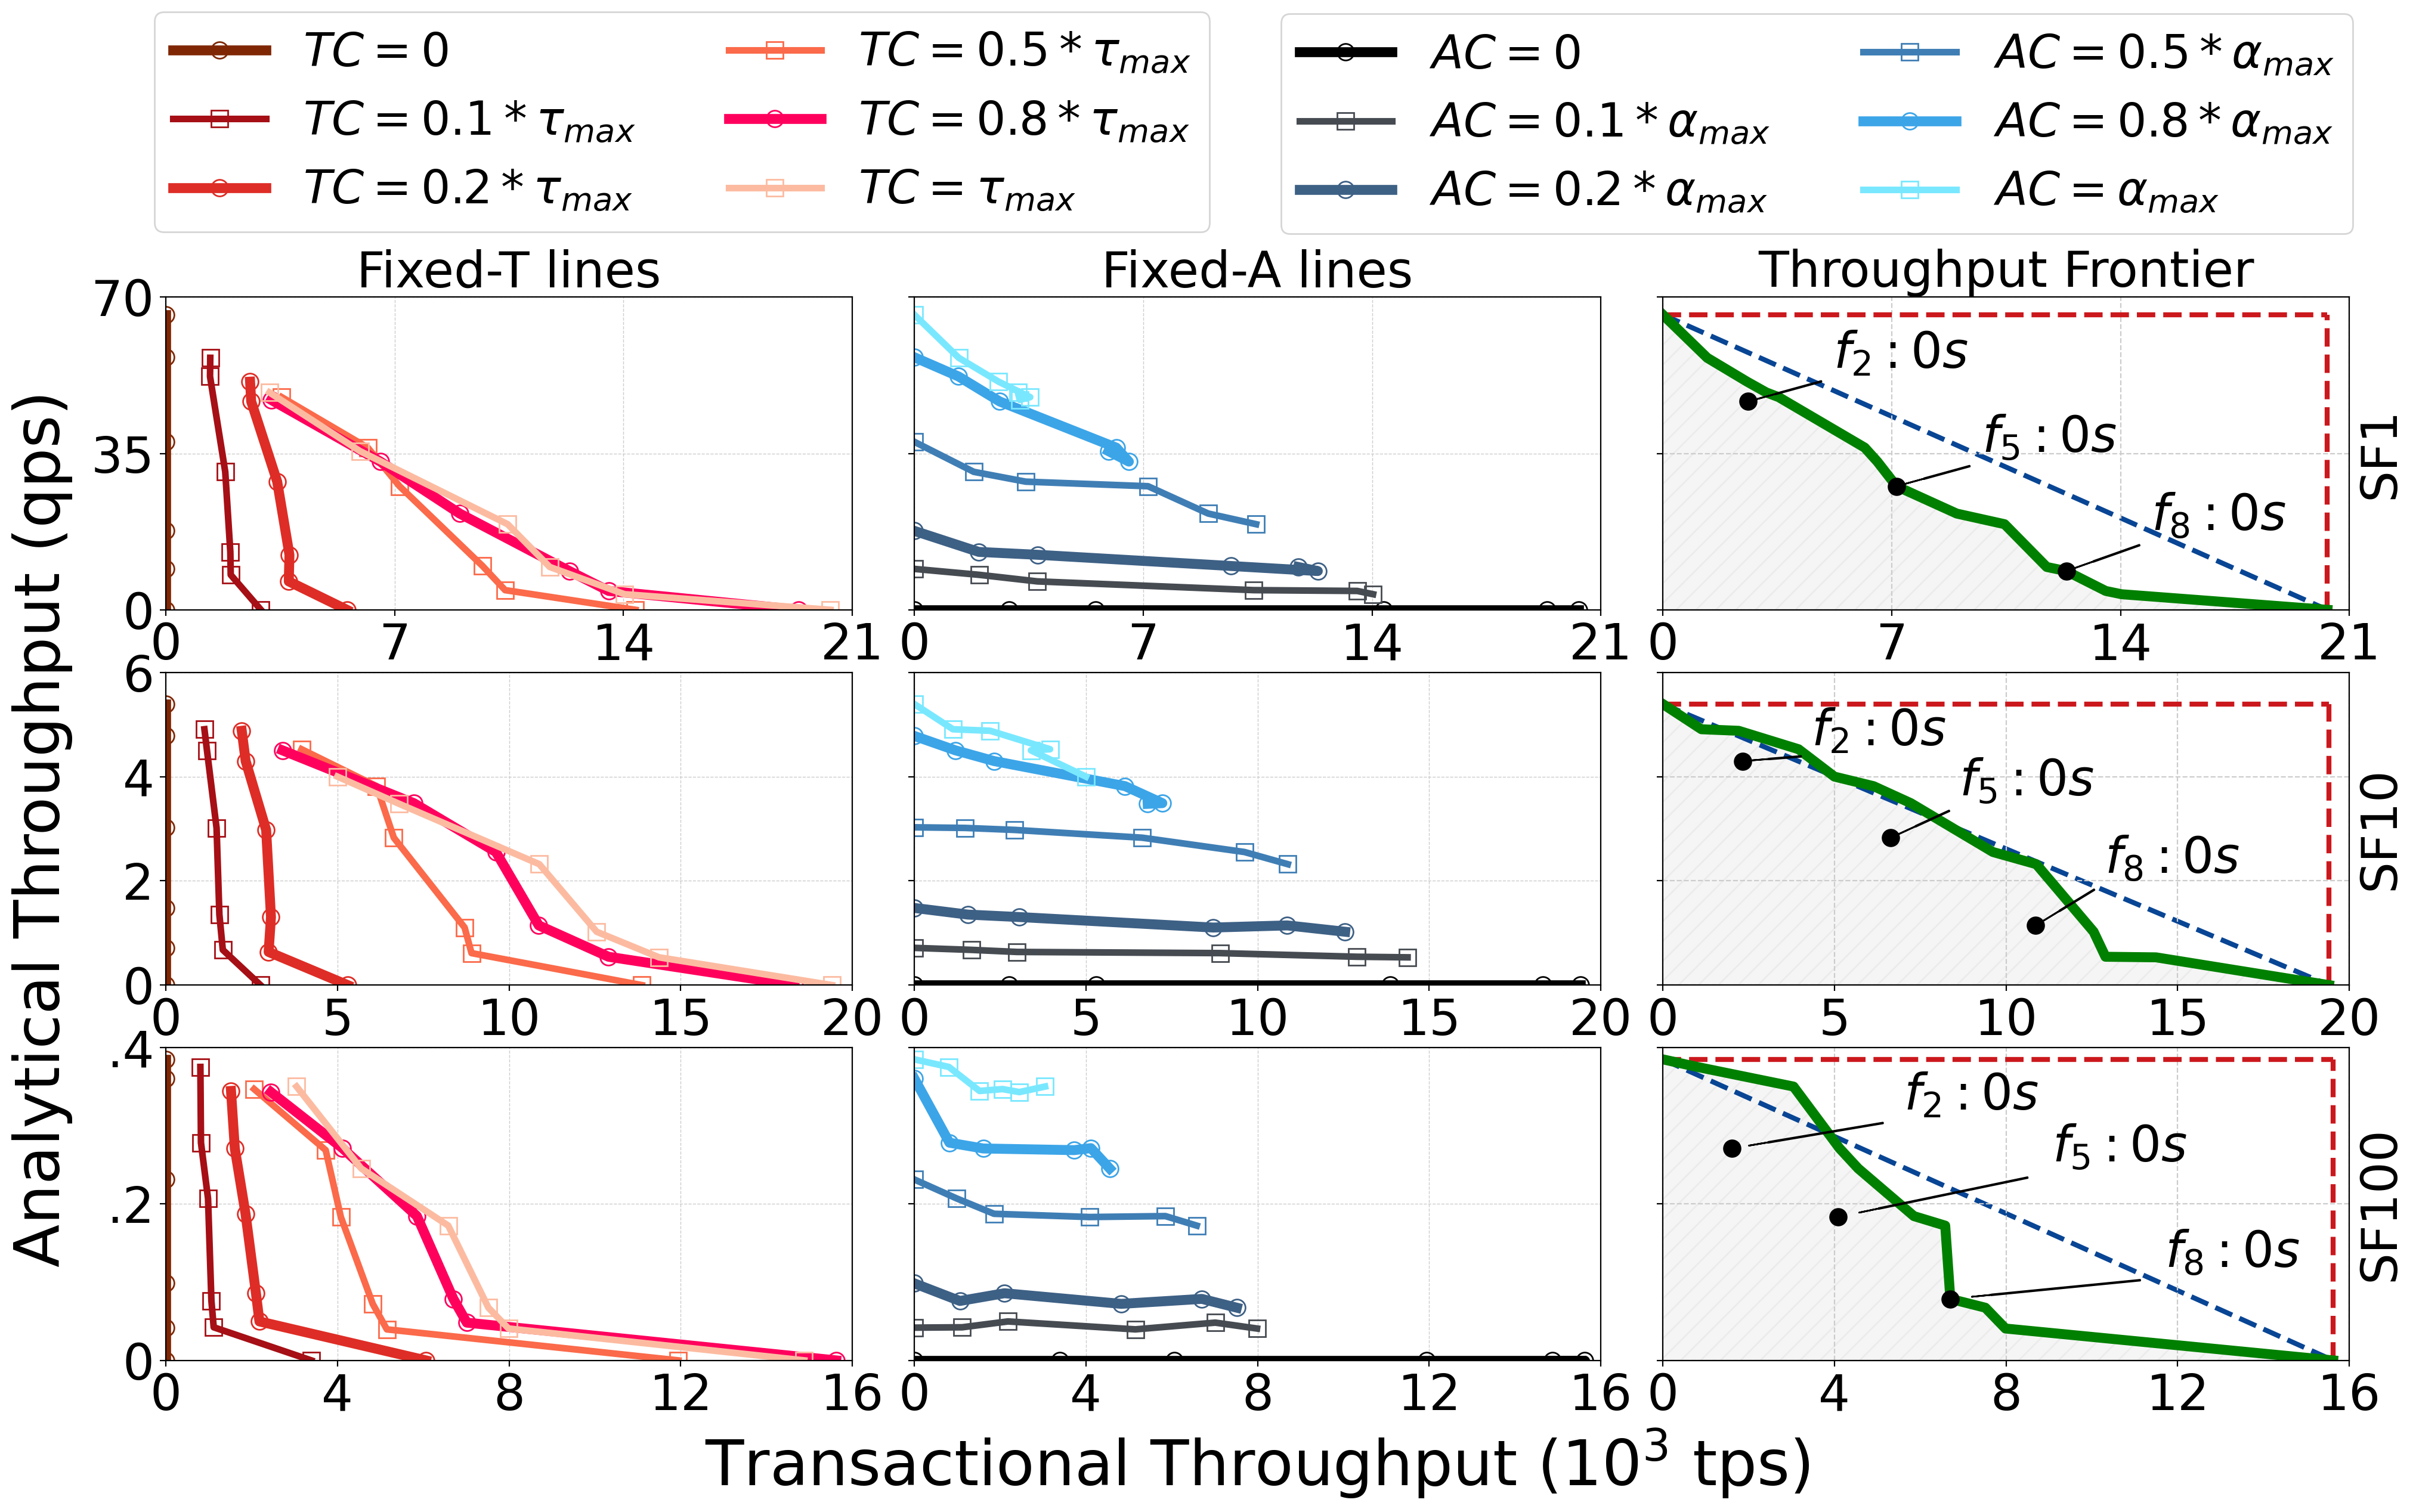

In [ ]:
cm = 1/2.54  # centimeters in inches
f, [(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)] = plt.subplots(3, 3, figsize=(60*cm,30*cm))
plt.subplots_adjust(wspace=0.09, hspace=0.2)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

# ------ SF1 -------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF.csv1')
ax1.axis([0,21000, 0, 70])
ax2.axis([0,21000, 0, 70])
ax3.axis([0,21000, 0, 70])

x = [0, 7000, 14000, 21000]
xticks = ['0', '7', '14', '21']
y = [0, 35, 70]
yticks = ['', '', '']
y2ticks = ['0', '35', '70']

ax1.set_xticks(x, minor=False)
ax1.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax2.set_xticks(x, minor=False)
ax2.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax3.set_xticks(x, minor=False)
ax3.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax1.set_yticks(y, minor=False)
ax1.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax2.set_yticks(y, minor=False)
ax2.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax3.set_yticks(y, minor=False)
ax3.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax8.set_xlabel('Transactional Throughput ($10^3$ tps)', fontsize=label_size)

ax1.set_title('Fixed-T lines', fontsize=sub_label_size)
ax2.set_title('Fixed-A lines', fontsize=sub_label_size)
ax3.set_title('Throughput Frontier', fontsize=sub_label_size)

#ax5.set_title('SF10')
#ax8.set_title('SF100')

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax1)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax2)
proportional_line(frontier, idx, ax3)
bounding_box(frontier, idx, ax3)
frontier_plot(frontier, idx, "", ax3, tc, ac, 2600, 7.5, 2600, 7.5, 2600, 9, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)

# ------ SF10 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF10.csv')
ax4.axis([0,20000, 0, 6])
ax5.axis([0,20000, 0, 6])
ax6.axis([0,20000, 0, 6])

x = [0, 5000, 10000, 15000, 20000]
xticks = ['0', '5', '10', '15', '20']
y = [0, 2, 4, 6]
yticks = ['', '', '', '']
y2ticks = ['0', '2', '4', '6']

ax4.set_xticks(x, minor=False)
ax4.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax5.set_xticks(x, minor=False)
ax5.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax6.set_xticks(x, minor=False)
ax6.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax4.set_yticks(y, minor=False)
ax4.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax5.set_yticks(y, minor=False)
ax5.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax6.set_yticks(y, minor=False)
ax6.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax4.set_ylabel('Analytical Throughput (qps)', fontsize=label_size, labelpad=30)

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax4)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax5)
proportional_line(frontier, idx, ax6)
bounding_box(frontier, idx, ax6)
frontier_plot(frontier, idx, "", ax6, tc, ac, 2000, 0.3, 2000, 0.8, 2000, 1, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)


# ------ SF100 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF100.csv')
ax7.axis([0,16000, 0, 0.4])
ax8.axis([0,16000, 0, 0.4])
ax9.axis([0,16000, 0, 0.4])

x = [0, 4000, 8000, 12000, 16000]
xticks = ['0', '4', '8', '12', '16']
y = [0,  0.2, 0.4]
yticks = ['', '', '']
y2ticks = ['0', '.2', '.4']

ax7.set_xticks(x, minor=False)
ax7.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax8.set_xticks(x, minor=False)
ax8.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax9.set_xticks(x, minor=False)
ax9.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)


ax7.set_yticks(y, minor=False)
ax7.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax8.set_yticks(y, minor=False)
ax8.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax9.set_yticks(y, minor=False)
ax9.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax1.legend(loc='center left', bbox_to_anchor=(-0.05, 1.56),ncol=2, fontsize=legend_size ) 
ax2.legend(loc='upper left', bbox_to_anchor=(0.5,1.98),ncol=2, fontsize=legend_size ) 
#ax3.legend(loc='upper left', bbox_to_anchor=(0, 1.5),ncol=2, fontsize=6) 


ax3.yaxis.set_label_position("right")
ax3.set_ylabel('SF1', fontsize=sub_label_size )
ax6.yaxis.set_label_position("right")
ax6.set_ylabel('SF10', fontsize=sub_label_size )
ax9.yaxis.set_label_position("right")
ax9.set_ylabel('SF100', fontsize=sub_label_size ) 
    
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax8)
proportional_line(frontier, idx, ax9)
bounding_box(frontier, idx, ax9)
frontier_plot(frontier, idx, "", ax9, tc, ac, 4000, 0.05, 5000, 0.07, 5000, 0.04, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)

f.savefig(path+'Plots/postgres.pdf', dpi=400, bbox_inches='tight')

# 2. Postgres Streaming Replication

## Synchronous On 

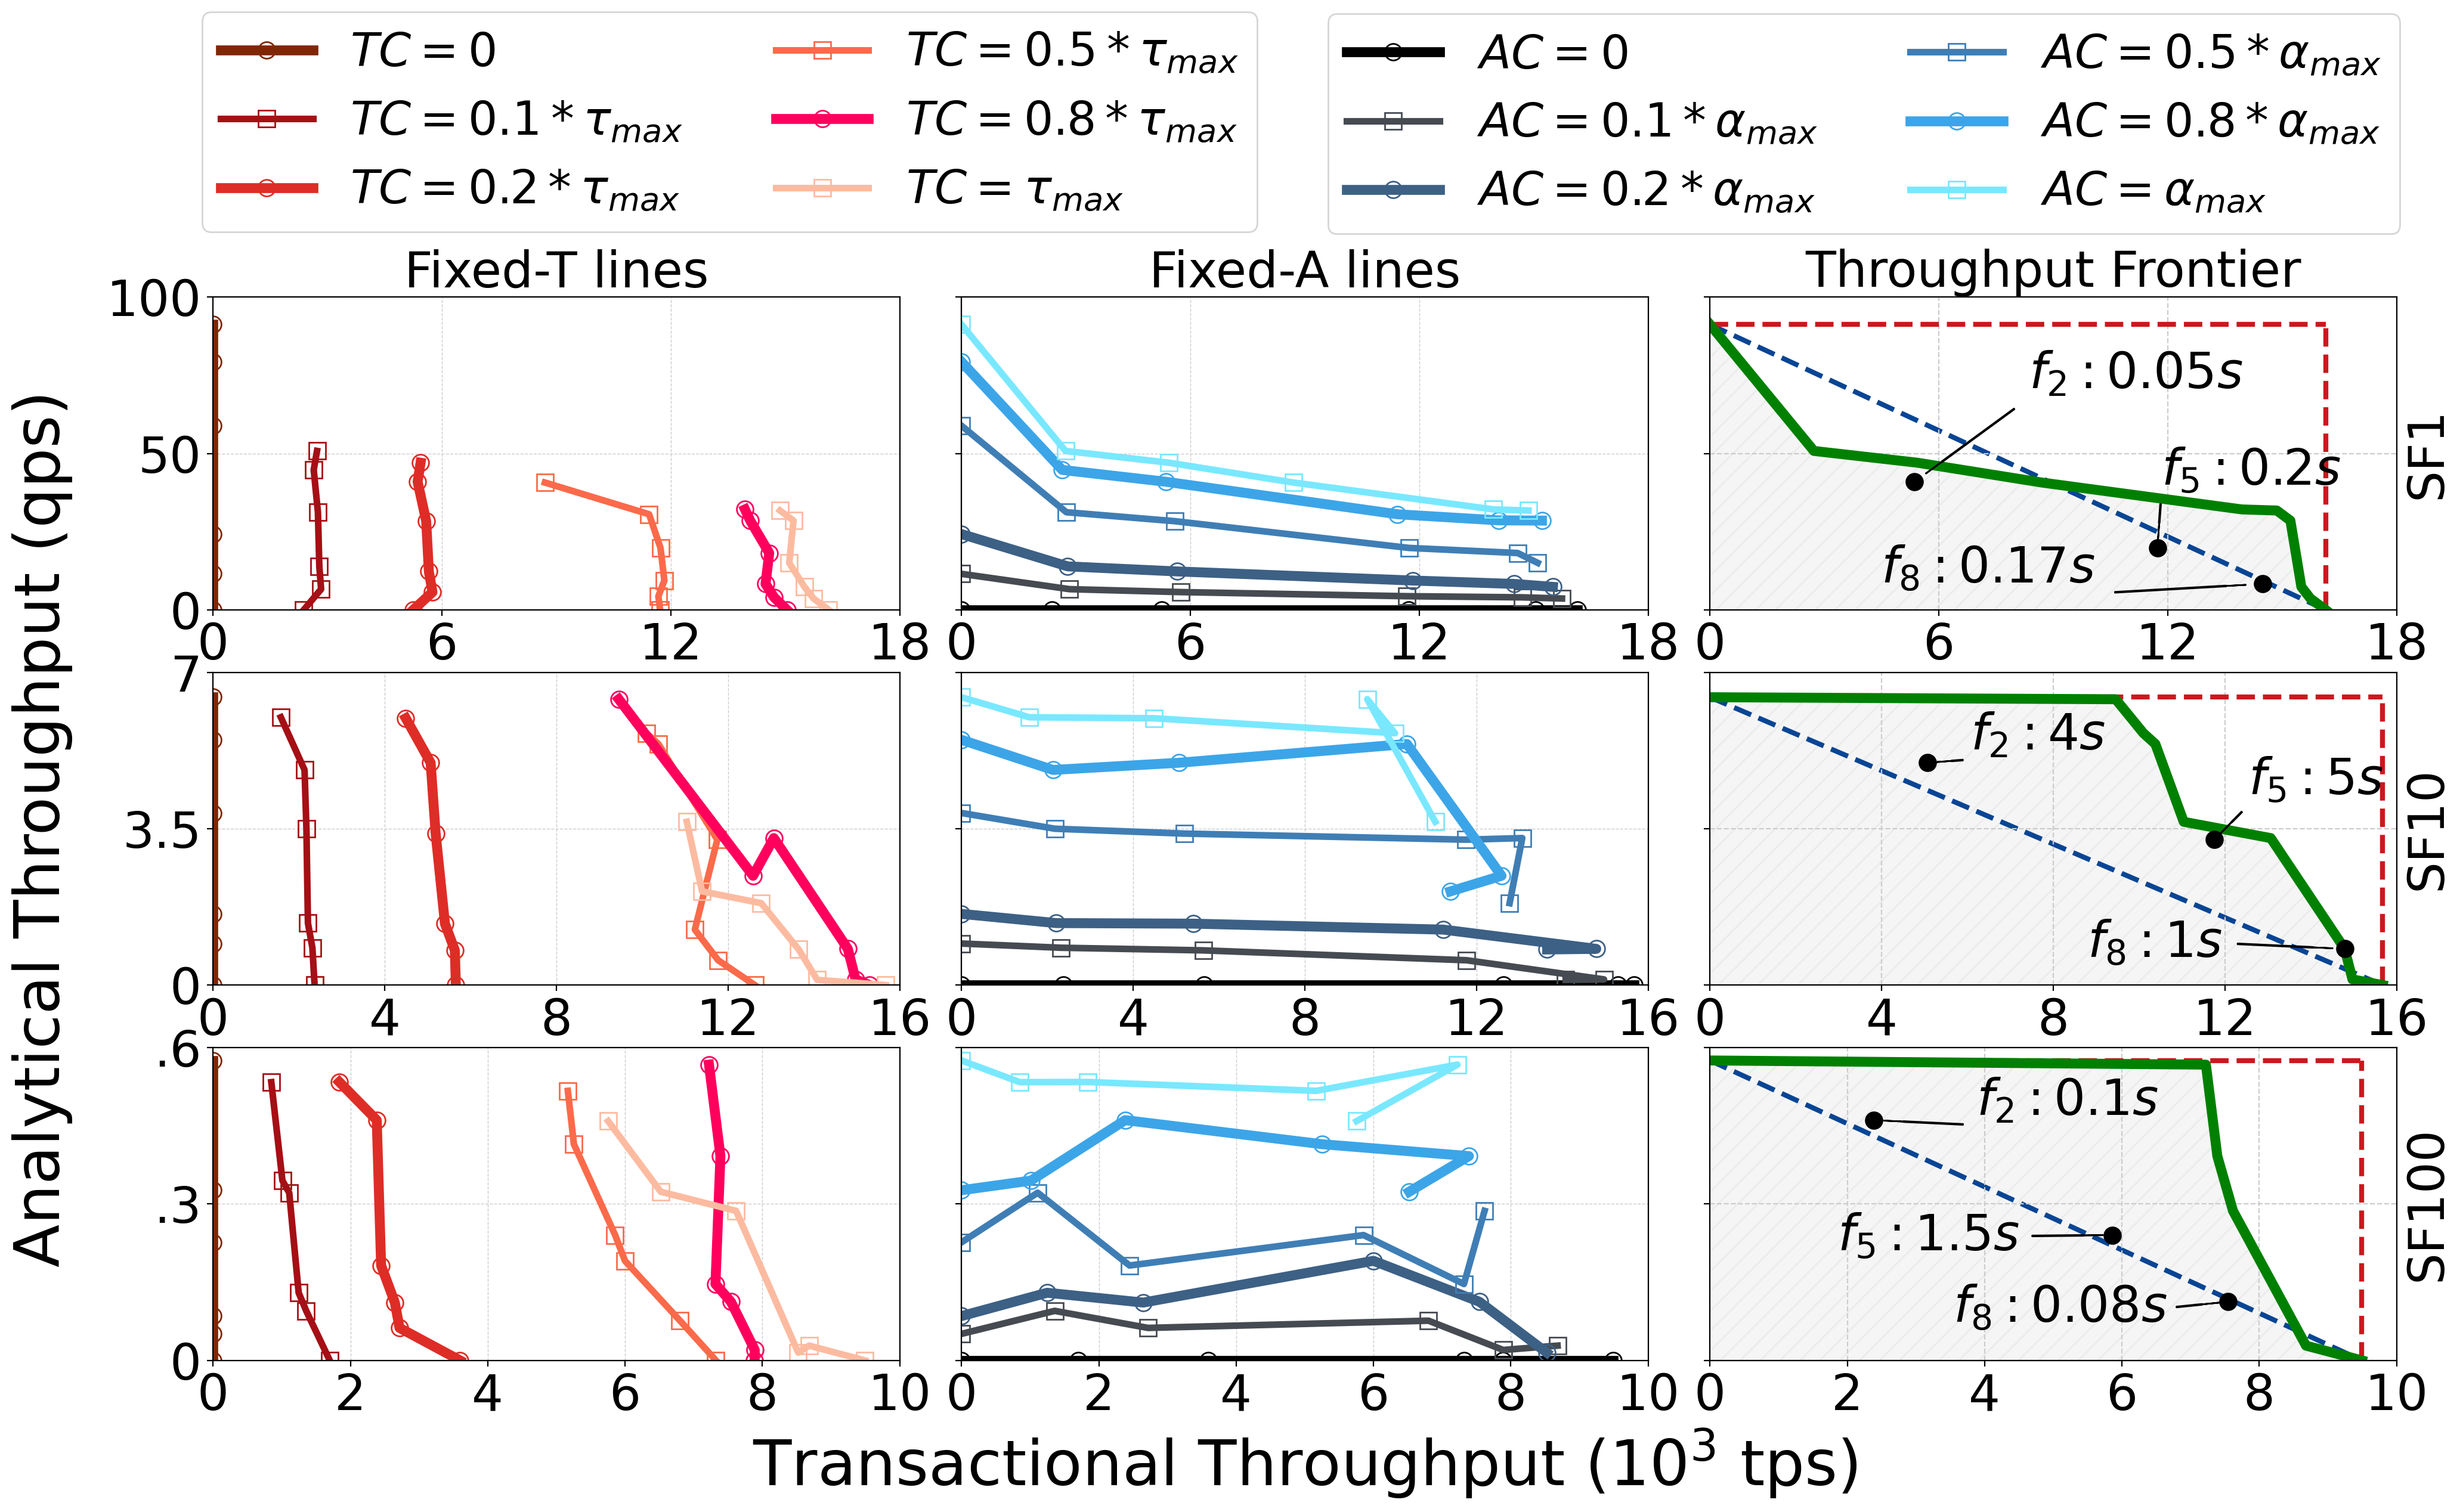

In [ ]:
cm = 1/2.54  # centimeters in inches
f, [(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)] = plt.subplots(3, 3, figsize=(60*cm,30*cm))
plt.subplots_adjust(wspace=0.09, hspace=0.2)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['text.usetex'] = True

# ------ SF1 -------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF1.csv')
ax1.axis([0,18000, 0, 100])
ax2.axis([0,18000, 0, 100])
ax3.axis([0,18000, 0, 100])

x = [0, 6000, 12000,  18000]
xticks = ['0', '6', '12', '18']
y = [0, 50, 100]
yticks = ['', '', '']
y2ticks = ['0', '50', '100']

ax1.set_xticks(x, minor=False)
ax1.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax2.set_xticks(x, minor=False)
ax2.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax3.set_xticks(x, minor=False)
ax3.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax1.set_yticks(y, minor=False)
ax1.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax2.set_yticks(y, minor=False)
ax2.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax3.set_yticks(y, minor=False)
ax3.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax8.set_xlabel('Transactional Throughput ($10^3$ tps)', fontsize=label_size)

ax1.set_title('Fixed-T lines', fontsize=sub_label_size)
ax2.set_title('Fixed-A lines', fontsize=sub_label_size)
ax3.set_title('Throughput Frontier', fontsize=sub_label_size)

#ax5.set_title('SF10')
#ax8.set_title('SF100')

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax1)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax2)
proportional_line(frontier, idx, ax3)
bounding_box(frontier, idx, ax3)
frontier_plot(frontier, idx, "", ax3, tc, ac, 3000, +30, +100, +20, -10000, +0.2, r"$f_2:0.05s$", r"$f_5:0.2s$", r"$f_8:0.17s$", 1)

# ------ SF10 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF10.csv')
ax4.axis([0,16000, 0, 7])
ax5.axis([0,16000, 0, 7])
ax6.axis([0,16000, 0, 7])

x = [0, 4000, 8000, 12000, 16000]
xticks = ['0', '4', '8', '12', '16']
y = [0,  3.5,  7]
yticks = ['', '', '']
y2ticks = ['0',  '3.5',  '7']

ax4.set_xticks(x, minor=False)
ax4.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax5.set_xticks(x, minor=False)
ax5.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax6.set_xticks(x, minor=False)
ax6.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax4.set_yticks(y, minor=False)
ax4.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax5.set_yticks(y, minor=False)
ax5.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax6.set_yticks(y, minor=False)
ax6.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax4.set_ylabel('Analytical Throughput (qps)', fontsize=label_size, labelpad=30)

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax4)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax5)
proportional_line(frontier, idx, ax6)
bounding_box(frontier, idx, ax6)
frontier_plot(frontier, idx, "", ax6, tc, ac,  1000, 0.3, 800, 1, -6000, -0.2, r"$f_2:4s$", r"$f_5:5s$", r"$f_8:1s$", 1)


# ------ SF100 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF100.csv')
ax7.axis([0,10000, 0, 0.6])
ax8.axis([0,10000, 0, 0.6])
ax9.axis([0,10000, 0, 0.6])

x = [0, 2000, 4000, 6000, 8000, 10000]
xticks = ['0', '2', '4', '6', '8', '10']
y = [0,   0.3, 0.6]
yticks = ['', '', '']
y2ticks = ['0',  '.3', '.6']

ax7.set_xticks(x, minor=False)
ax7.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax8.set_xticks(x, minor=False)
ax8.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax9.set_xticks(x, minor=False)
ax9.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)


ax7.set_yticks(y, minor=False)
ax7.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax8.set_yticks(y, minor=False)
ax8.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax9.set_yticks(y, minor=False)
ax9.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax1.legend(loc='center left', bbox_to_anchor=(-0.05, 1.56),ncol=2, fontsize=legend_size ) 
ax2.legend(loc='upper left', bbox_to_anchor=(0.5,1.98),ncol=2, fontsize=legend_size ) 
#ax3.legend(loc='upper left', bbox_to_anchor=(0, 1.5),ncol=2, fontsize=6) 


ax3.yaxis.set_label_position("right")
ax3.set_ylabel('SF1', fontsize=sub_label_size )
ax6.yaxis.set_label_position("right")
ax6.set_ylabel('SF10', fontsize=sub_label_size )
ax9.yaxis.set_label_position("right")
ax9.set_ylabel('SF100', fontsize=sub_label_size ) 
    
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax8)
proportional_line(frontier, idx, ax9)
bounding_box(frontier, idx, ax9)
frontier_plot(frontier, idx, "", ax9, tc, ac, 1500, 0.01, -4000, -0.03, -4000, -0.04, r"$f_2:0.1s$", r"$f_5:1.5s$", r"$f_8:0.08s$", 1)

f.savefig(path+'Plots/postgres-re-on.pdf', dpi=400, bbox_inches='tight')

# 3. SQL Server

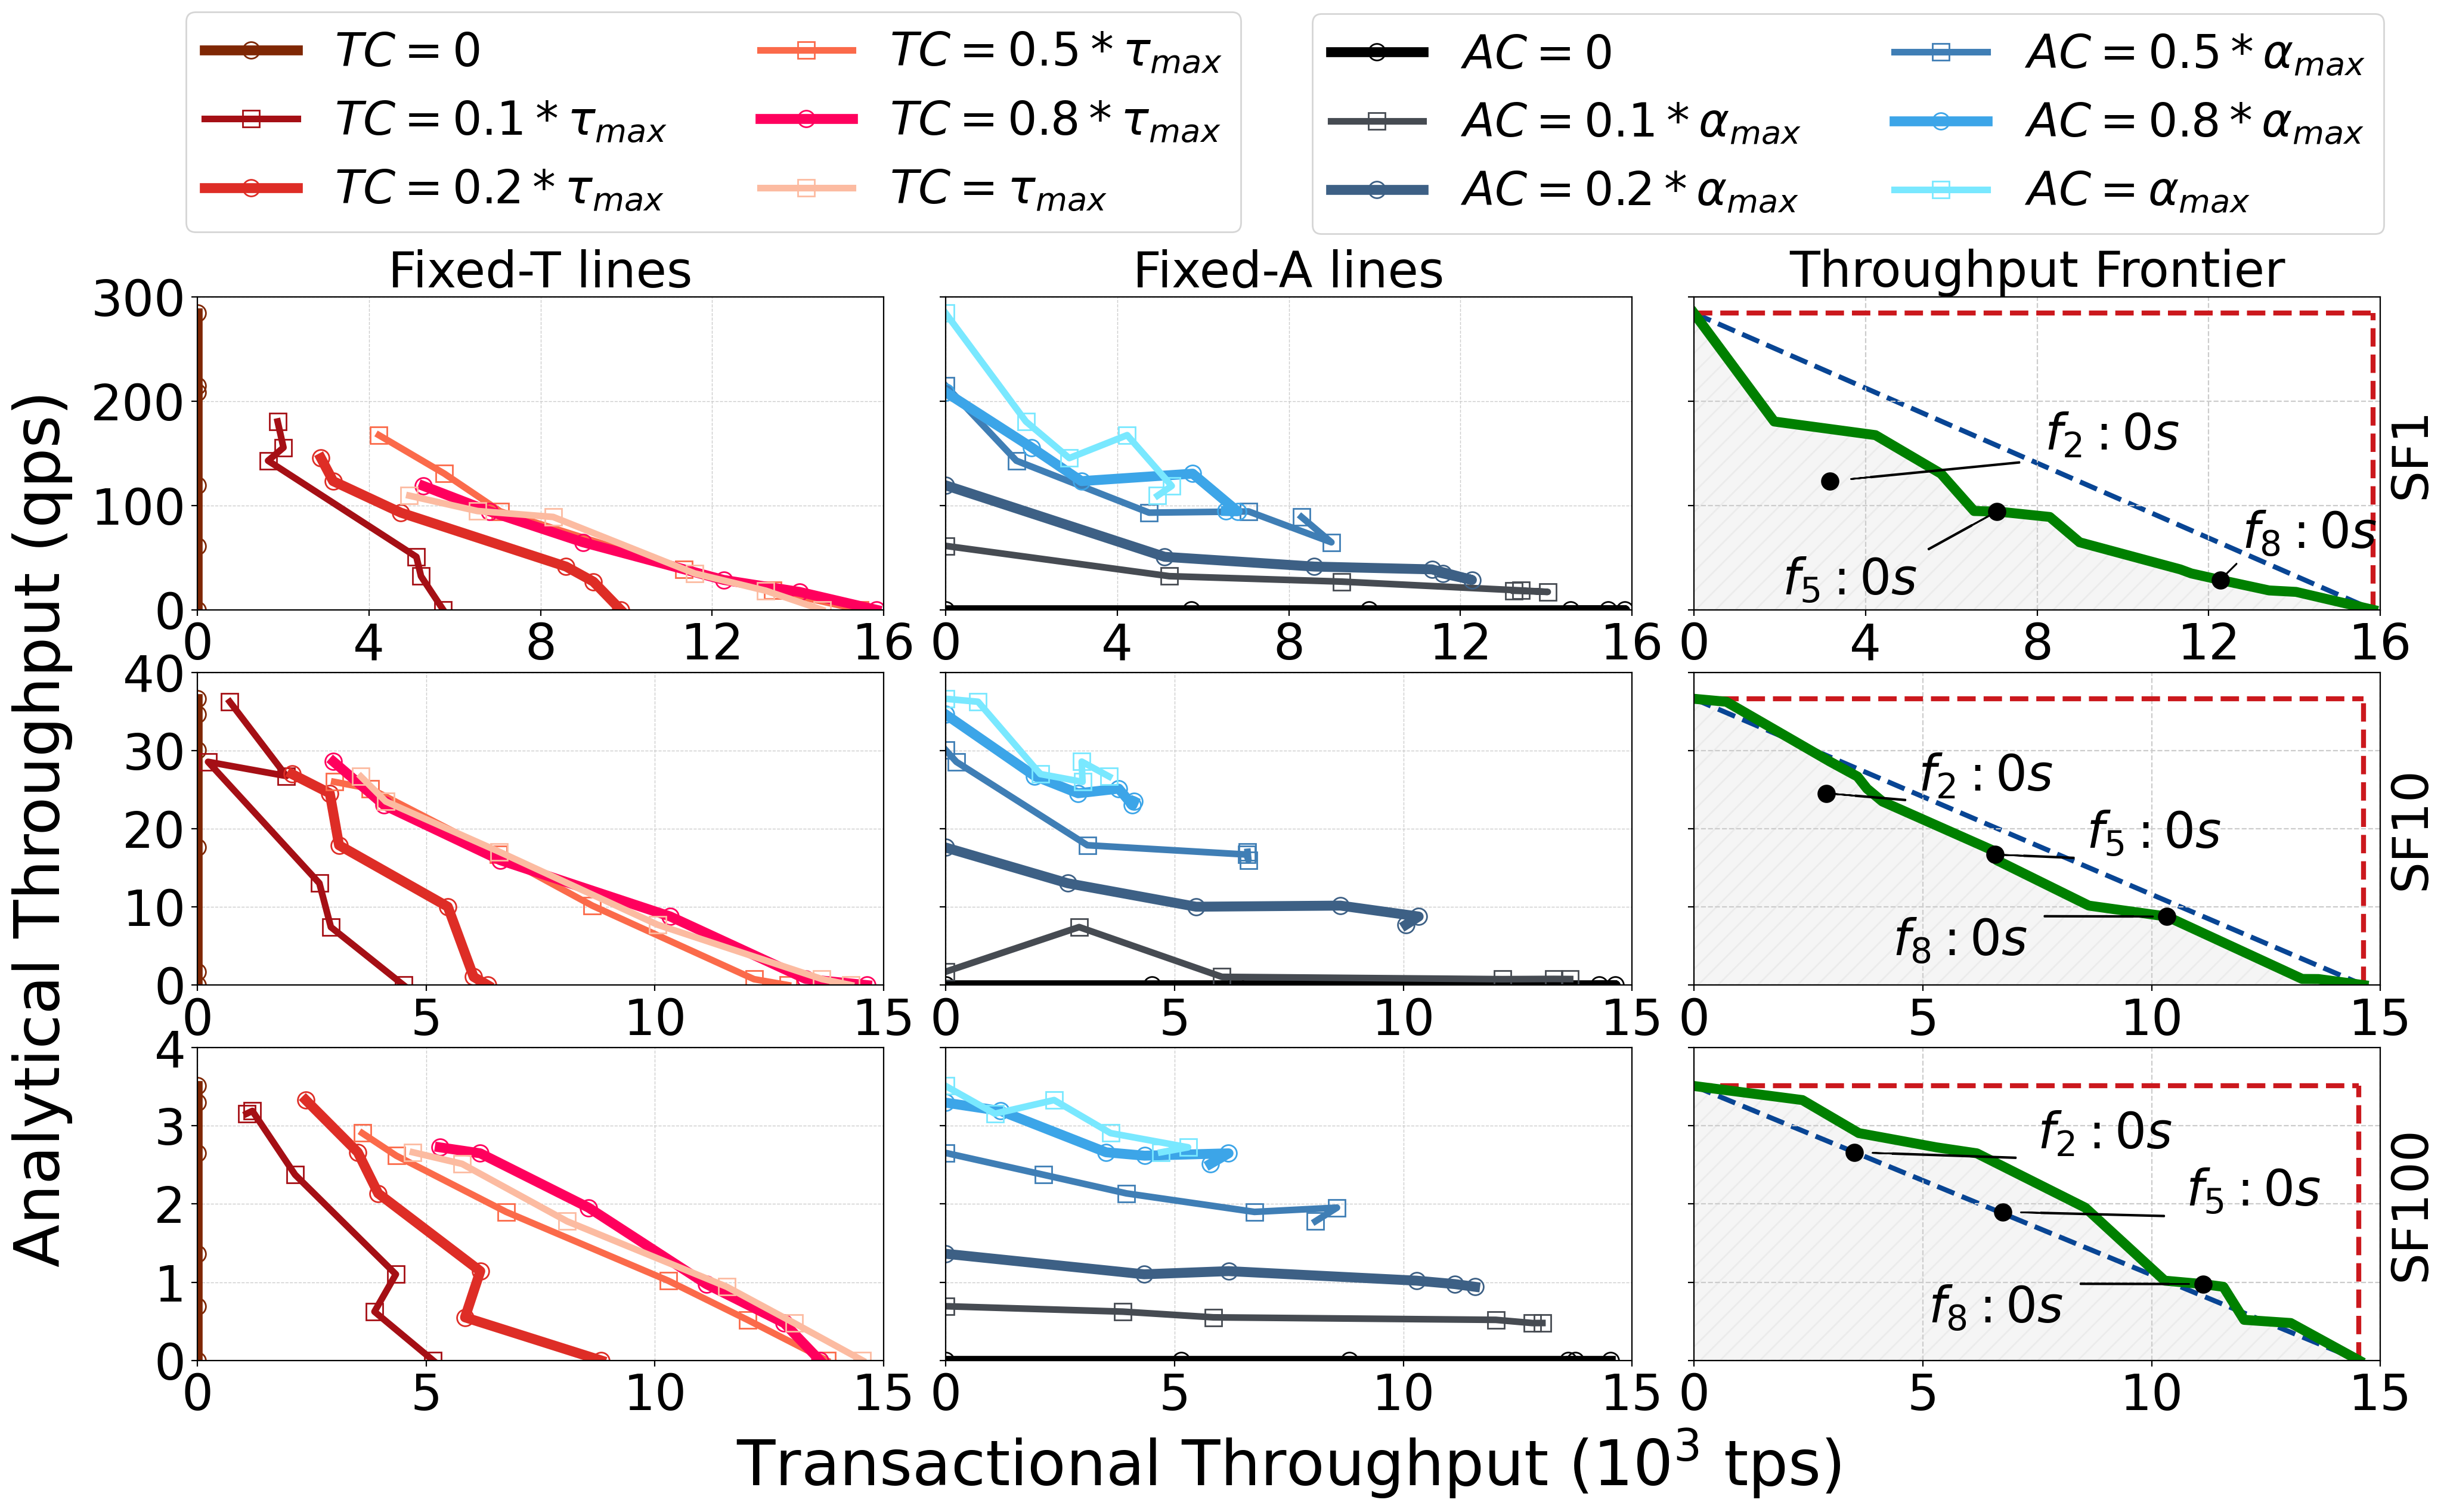

In [ ]:
cm = 1/2.54  # centimeters in inches
f, [(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)] = plt.subplots(3, 3, figsize=(60*cm,30*cm))
plt.subplots_adjust(wspace=0.09, hspace=0.2)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['text.usetex'] = True

# ------ SF1 -------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF1.csv')
ax1.axis([0,16000, 0, 300])
ax2.axis([0,16000, 0, 300])
ax3.axis([0,16000, 0, 300])

x = [0, 4000, 8000, 12000, 16000]
xticks = ['0', '4', '8', '12', '16']
y = [0, 100, 200, 300]
yticks = ['', '', '', '']
y2ticks = ['0', '100', '200', '300']

ax1.set_xticks(x, minor=False)
ax1.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax2.set_xticks(x, minor=False)
ax2.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax3.set_xticks(x, minor=False)
ax3.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax1.set_yticks(y, minor=False)
ax1.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax2.set_yticks(y, minor=False)
ax2.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax3.set_yticks(y, minor=False)
ax3.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax8.set_xlabel('Transactional Throughput ($10^3$ tps)', fontsize=label_size)

ax1.set_title('Fixed-T lines', fontsize=sub_label_size)
ax2.set_title('Fixed-A lines', fontsize=sub_label_size)
ax3.set_title('Throughput Frontier', fontsize=sub_label_size)

#ax5.set_title('SF10')
#ax8.set_title('SF100')

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax1)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax2)
proportional_line(frontier, idx, ax3)
bounding_box(frontier, idx, ax3)
frontier_plot(frontier, idx, "", ax3, tc, ac, 5000, 30, -5000, -80, 500, 30, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)

# ------ SF10 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF10.csv')
ax4.axis([0,15000, 0, 4])
ax5.axis([0,15000, 0, 4])
ax6.axis([0,15000, 0, 4])

x = [0, 5000, 10000, 15000]
xticks = ['0', '5', '10', '15']
y = [0, 10, 20, 30, 40]
yticks = ['', '', '', '', '']
y2ticks = ['0', '10', '20', '30', '40']

ax4.set_xticks(x, minor=False)
ax4.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax5.set_xticks(x, minor=False)
ax5.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax6.set_xticks(x, minor=False)
ax6.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax4.set_yticks(y, minor=False)
ax4.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax5.set_yticks(y, minor=False)
ax5.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax6.set_yticks(y, minor=False)
ax6.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax4.set_ylabel('Analytical Throughput (qps)', fontsize=label_size, labelpad=30)

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax4)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax5)
proportional_line(frontier, idx, ax6)
bounding_box(frontier, idx, ax6)
frontier_plot(frontier, idx, "", ax6, tc, ac, 2000, 0.3, 2000, 0.8, -6000, -5, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)


# ------ SF100 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF100.csv')
ax7.axis([0,15000, 0, 4])
ax8.axis([0,15000, 0, 4])
ax9.axis([0,15000, 0, 4])

x = [0, 5000, 10000, 15000]
xticks = ['0', '5', '10', '15']
y = [0, 1, 2, 3, 4]
yticks = ['', '', '', '', '']
y2ticks = ['0', '1', '2', '3', '4']

ax7.set_xticks(x, minor=False)
ax7.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax8.set_xticks(x, minor=False)
ax8.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax9.set_xticks(x, minor=False)
ax9.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)


ax7.set_yticks(y, minor=False)
ax7.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax8.set_yticks(y, minor=False)
ax8.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax9.set_yticks(y, minor=False)
ax9.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax1.legend(loc='center left', bbox_to_anchor=(-0.05, 1.56),ncol=2, fontsize=legend_size ) 
ax2.legend(loc='upper left', bbox_to_anchor=(0.5,1.98),ncol=2, fontsize=legend_size ) 

ax3.yaxis.set_label_position("right")
ax3.set_ylabel('SF1', fontsize=sub_label_size )
ax6.yaxis.set_label_position("right")
ax6.set_ylabel('SF10', fontsize=sub_label_size )
ax9.yaxis.set_label_position("right")
ax9.set_ylabel('SF100', fontsize=sub_label_size ) 
    
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax8)
proportional_line(frontier, idx, ax9)
bounding_box(frontier, idx, ax9)
frontier_plot(frontier, idx, "", ax9,  tc, ac, 4000, 0.05, 4000, 0.07, -6000, -0.5, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)
f.savefig(path+'Plots/sqlserver.pdf', dpi=400, bbox_inches='tight')

# 3. TiDB

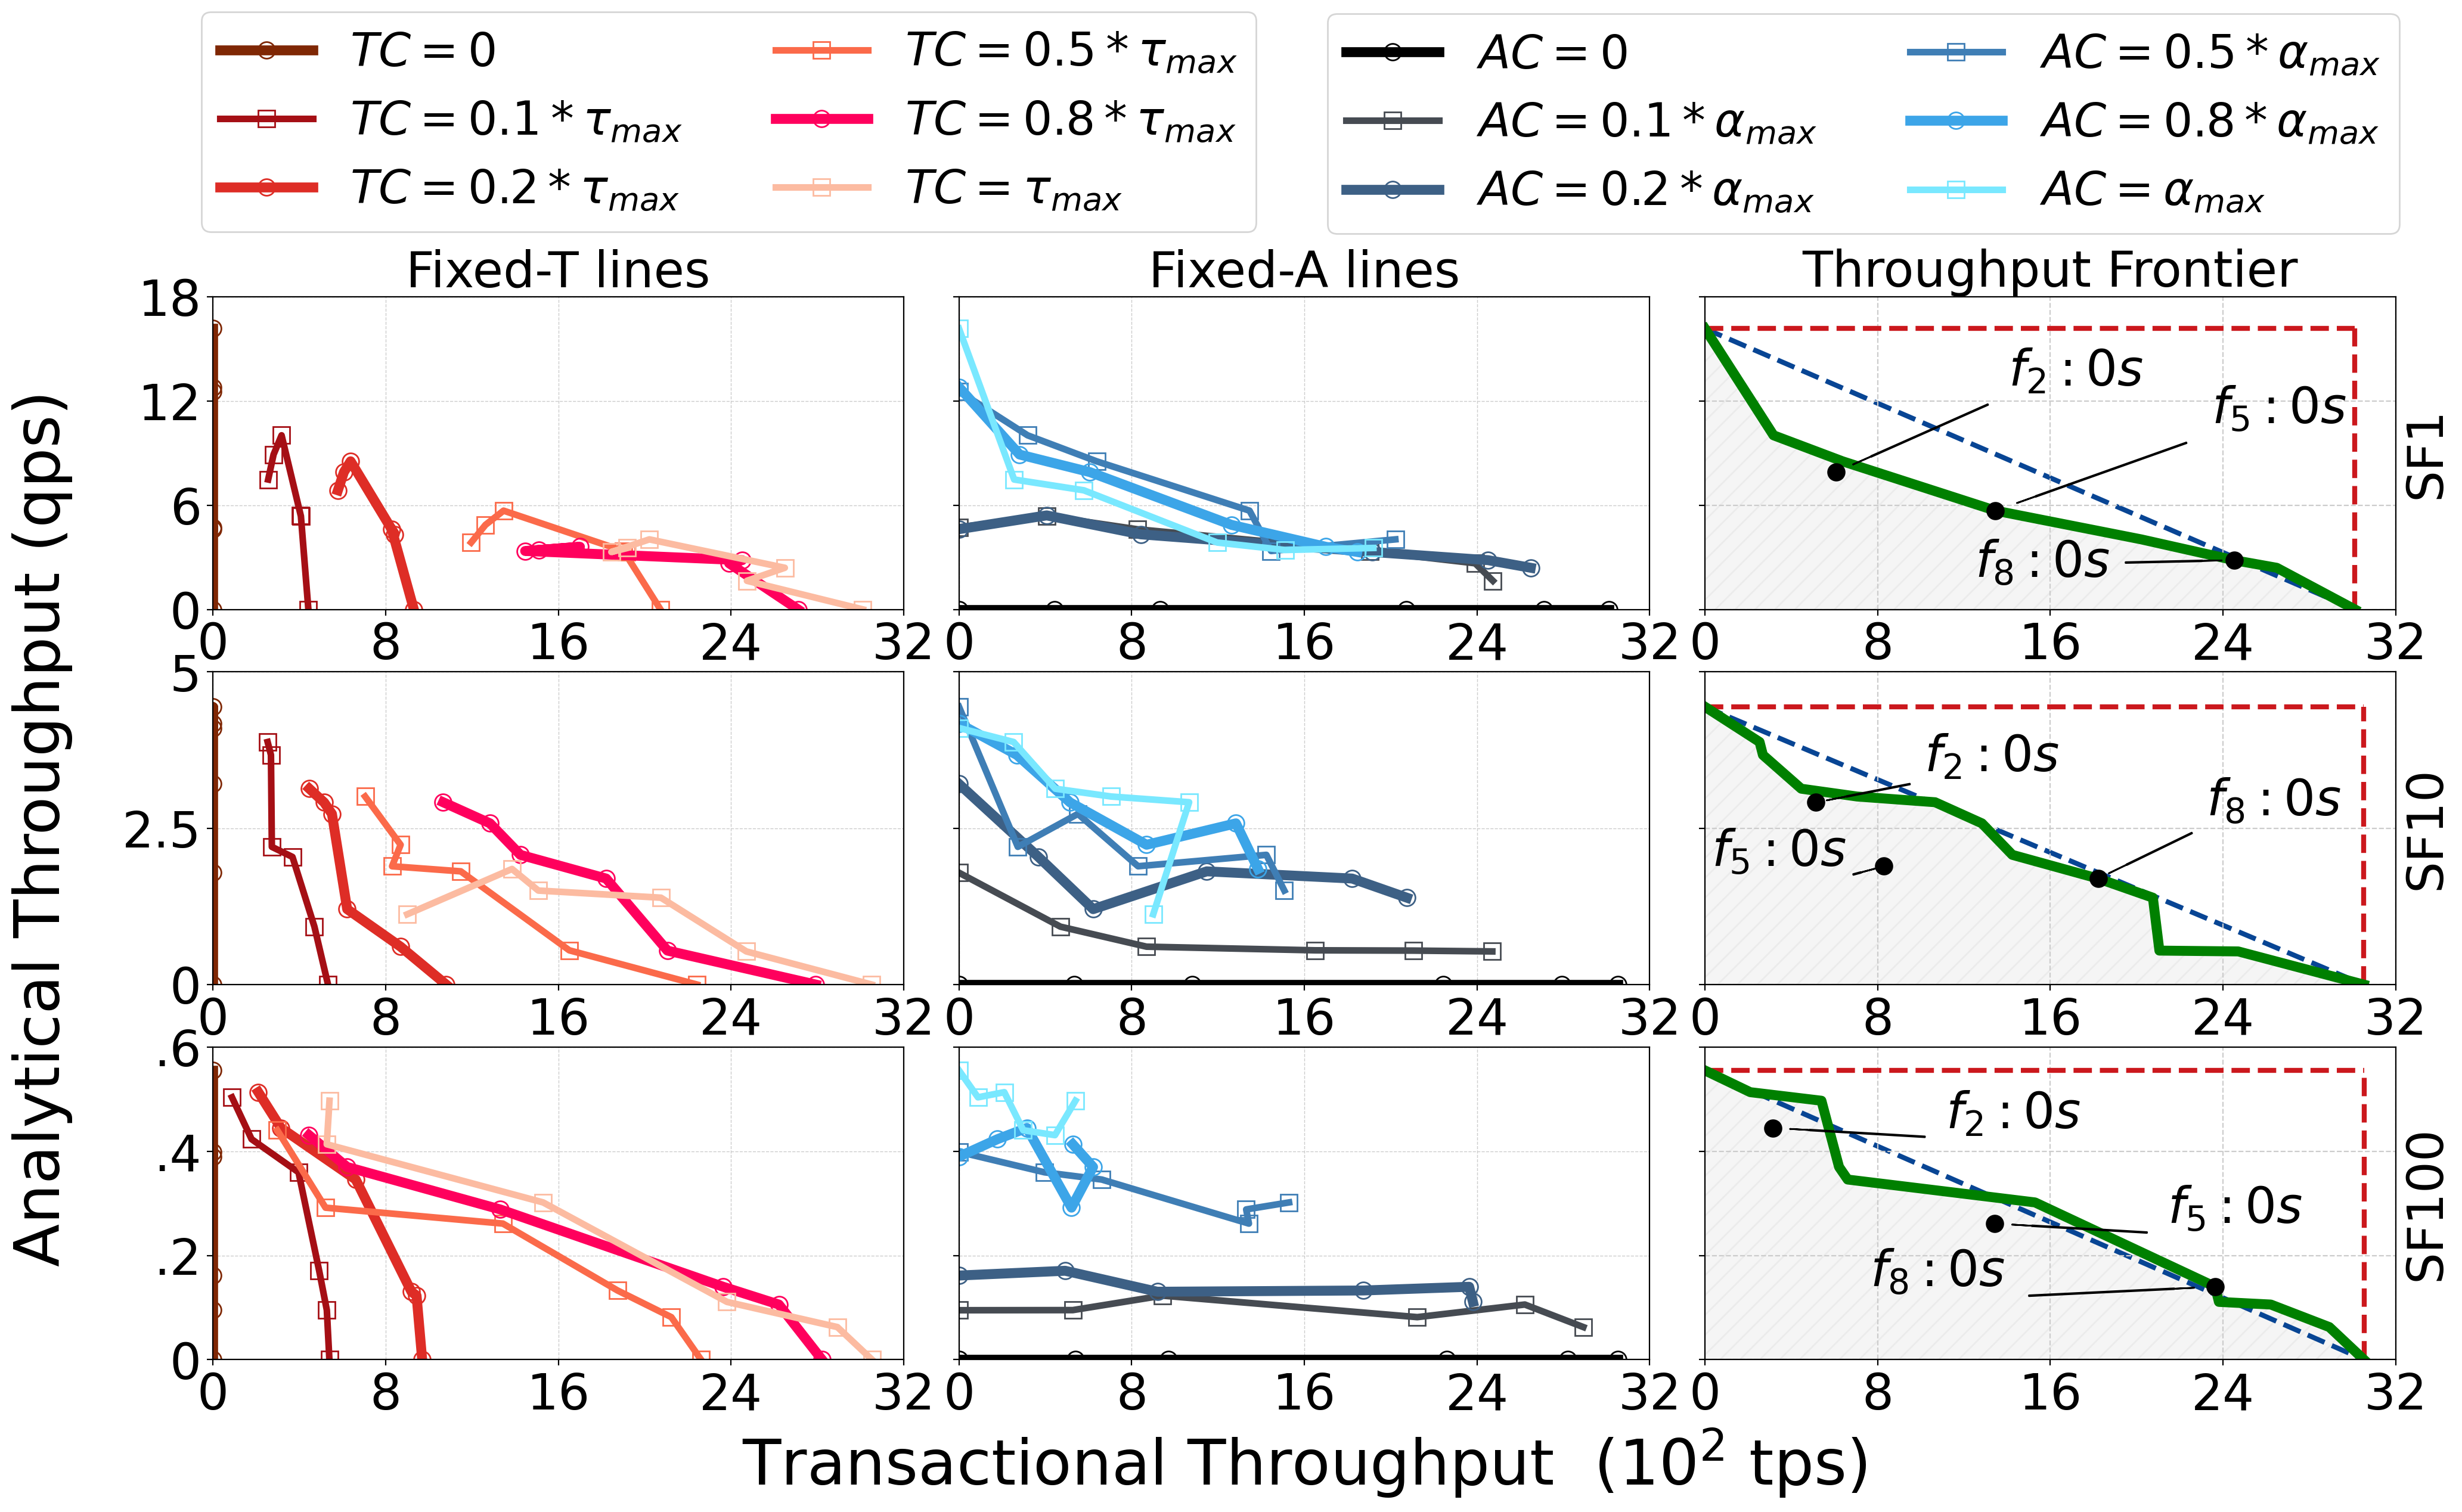

In [ ]:
cm = 1/2.54  # centimeters in inches
f, [(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)] = plt.subplots(3, 3, figsize=(60*cm,30*cm))
plt.subplots_adjust(wspace=0.08, hspace=0.2)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['text.usetex'] = True

# ------ SF1 -------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF1.csv')
ax1.axis([0,3200, 0, 18])
ax2.axis([0,3200, 0, 18])
ax3.axis([0,3200, 0, 18])

x = [0, 800, 1600, 2400, 3200]
xticks = ['0', '8', '16', '24', '32']
y = [0, 6, 12, 18]
yticks = ['',  '', '', '']
y2ticks = ['0', '6', '12', '18']

ax1.set_xticks(x, minor=False)
ax1.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax2.set_xticks(x, minor=False)
ax2.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax3.set_xticks(x, minor=False)
ax3.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax1.set_yticks(y, minor=False)
ax1.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax2.set_yticks(y, minor=False)
ax2.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax3.set_yticks(y, minor=False)
ax3.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax8.set_xlabel('Transactional Throughput  ($10^2$ tps)', fontsize=label_size)

ax1.set_title('Fixed-T lines', fontsize=sub_label_size)
ax2.set_title('Fixed-A lines', fontsize=sub_label_size)
ax3.set_title('Throughput Frontier', fontsize=sub_label_size)

#ax5.set_title('SF10')
#ax8.set_title('SF100')

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax1)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax2)
proportional_line(frontier, idx, ax3)
bounding_box(frontier, idx, ax3)
frontier_plot(frontier, idx, "", ax3, tc, ac, 800, 5, 1000, 5, -1200, -1, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)

# ------ SF10 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF10.csv')
ax4.axis([0,3200, 0, 5])
ax5.axis([0,3200, 0, 5])
ax6.axis([0,3200, 0, 5])

x = [0, 800, 1600, 2400, 3200]
xticks = ['0', '8', '16', '24', '32']
y = [0,   2.5,  5]
yticks = ['', '', '']
y2ticks = ['0', '2.5', '5']


ax4.set_xticks(x, minor=False)
ax4.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax5.set_xticks(x, minor=False)
ax5.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax6.set_xticks(x, minor=False)
ax6.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax4.set_yticks(y, minor=False)
ax4.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax5.set_yticks(y, minor=False)
ax5.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax6.set_yticks(y, minor=False)
ax6.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax4.set_ylabel('Analytical Throughput (qps)', fontsize=label_size, labelpad=30)

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax4)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax5)
proportional_line(frontier, idx, ax6)
bounding_box(frontier, idx, ax6)
frontier_plot(frontier, idx, "", ax6, tc, ac, 500, 0.5, -800, 0, 500, 1, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)


# ------ SF100 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF100.csv')
ax7.axis([0,2000, 0, 0.06])
ax8.axis([0,2000, 0, 0.06])
ax9.axis([0,2000, 0, 0.06])

x = [0, 500, 1000, 1500, 2000]
xticks = ['0', '8', '16', '24', '32']
y = [0, 0.02, 0.04, 0.06]
yticks = ['', '', '', '']
y2ticks = ['0', '.2', '.4', '.6']

ax7.set_xticks(x, minor=False)
ax7.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax8.set_xticks(x, minor=False)
ax8.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax9.set_xticks(x, minor=False)
ax9.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)


ax7.set_yticks(y, minor=False)
ax7.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax8.set_yticks(y, minor=False)
ax8.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax9.set_yticks(y, minor=False)
ax9.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax1.legend(loc='center left', bbox_to_anchor=(-0.05, 1.56),ncol=2, fontsize=legend_size ) 
ax2.legend(loc='upper left', bbox_to_anchor=(0.5,1.98),ncol=2, fontsize=legend_size )  

ax3.yaxis.set_label_position("right")
ax3.set_ylabel('SF1', fontsize=sub_label_size )
ax6.yaxis.set_label_position("right")
ax6.set_ylabel('SF10', fontsize=sub_label_size )
ax9.yaxis.set_label_position("right")
ax9.set_ylabel('SF100', fontsize=sub_label_size ) 
    
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax8)
proportional_line(frontier, idx, ax9)
bounding_box(frontier, idx, ax9)
frontier_plot(frontier, idx, "", ax9, tc, ac, 500, 0, 500, 0, -1000, 0, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)
f.savefig(path+'Plots/tidb.pdf', dpi=400, bbox_inches='tight')

# 4. TiDB distributed

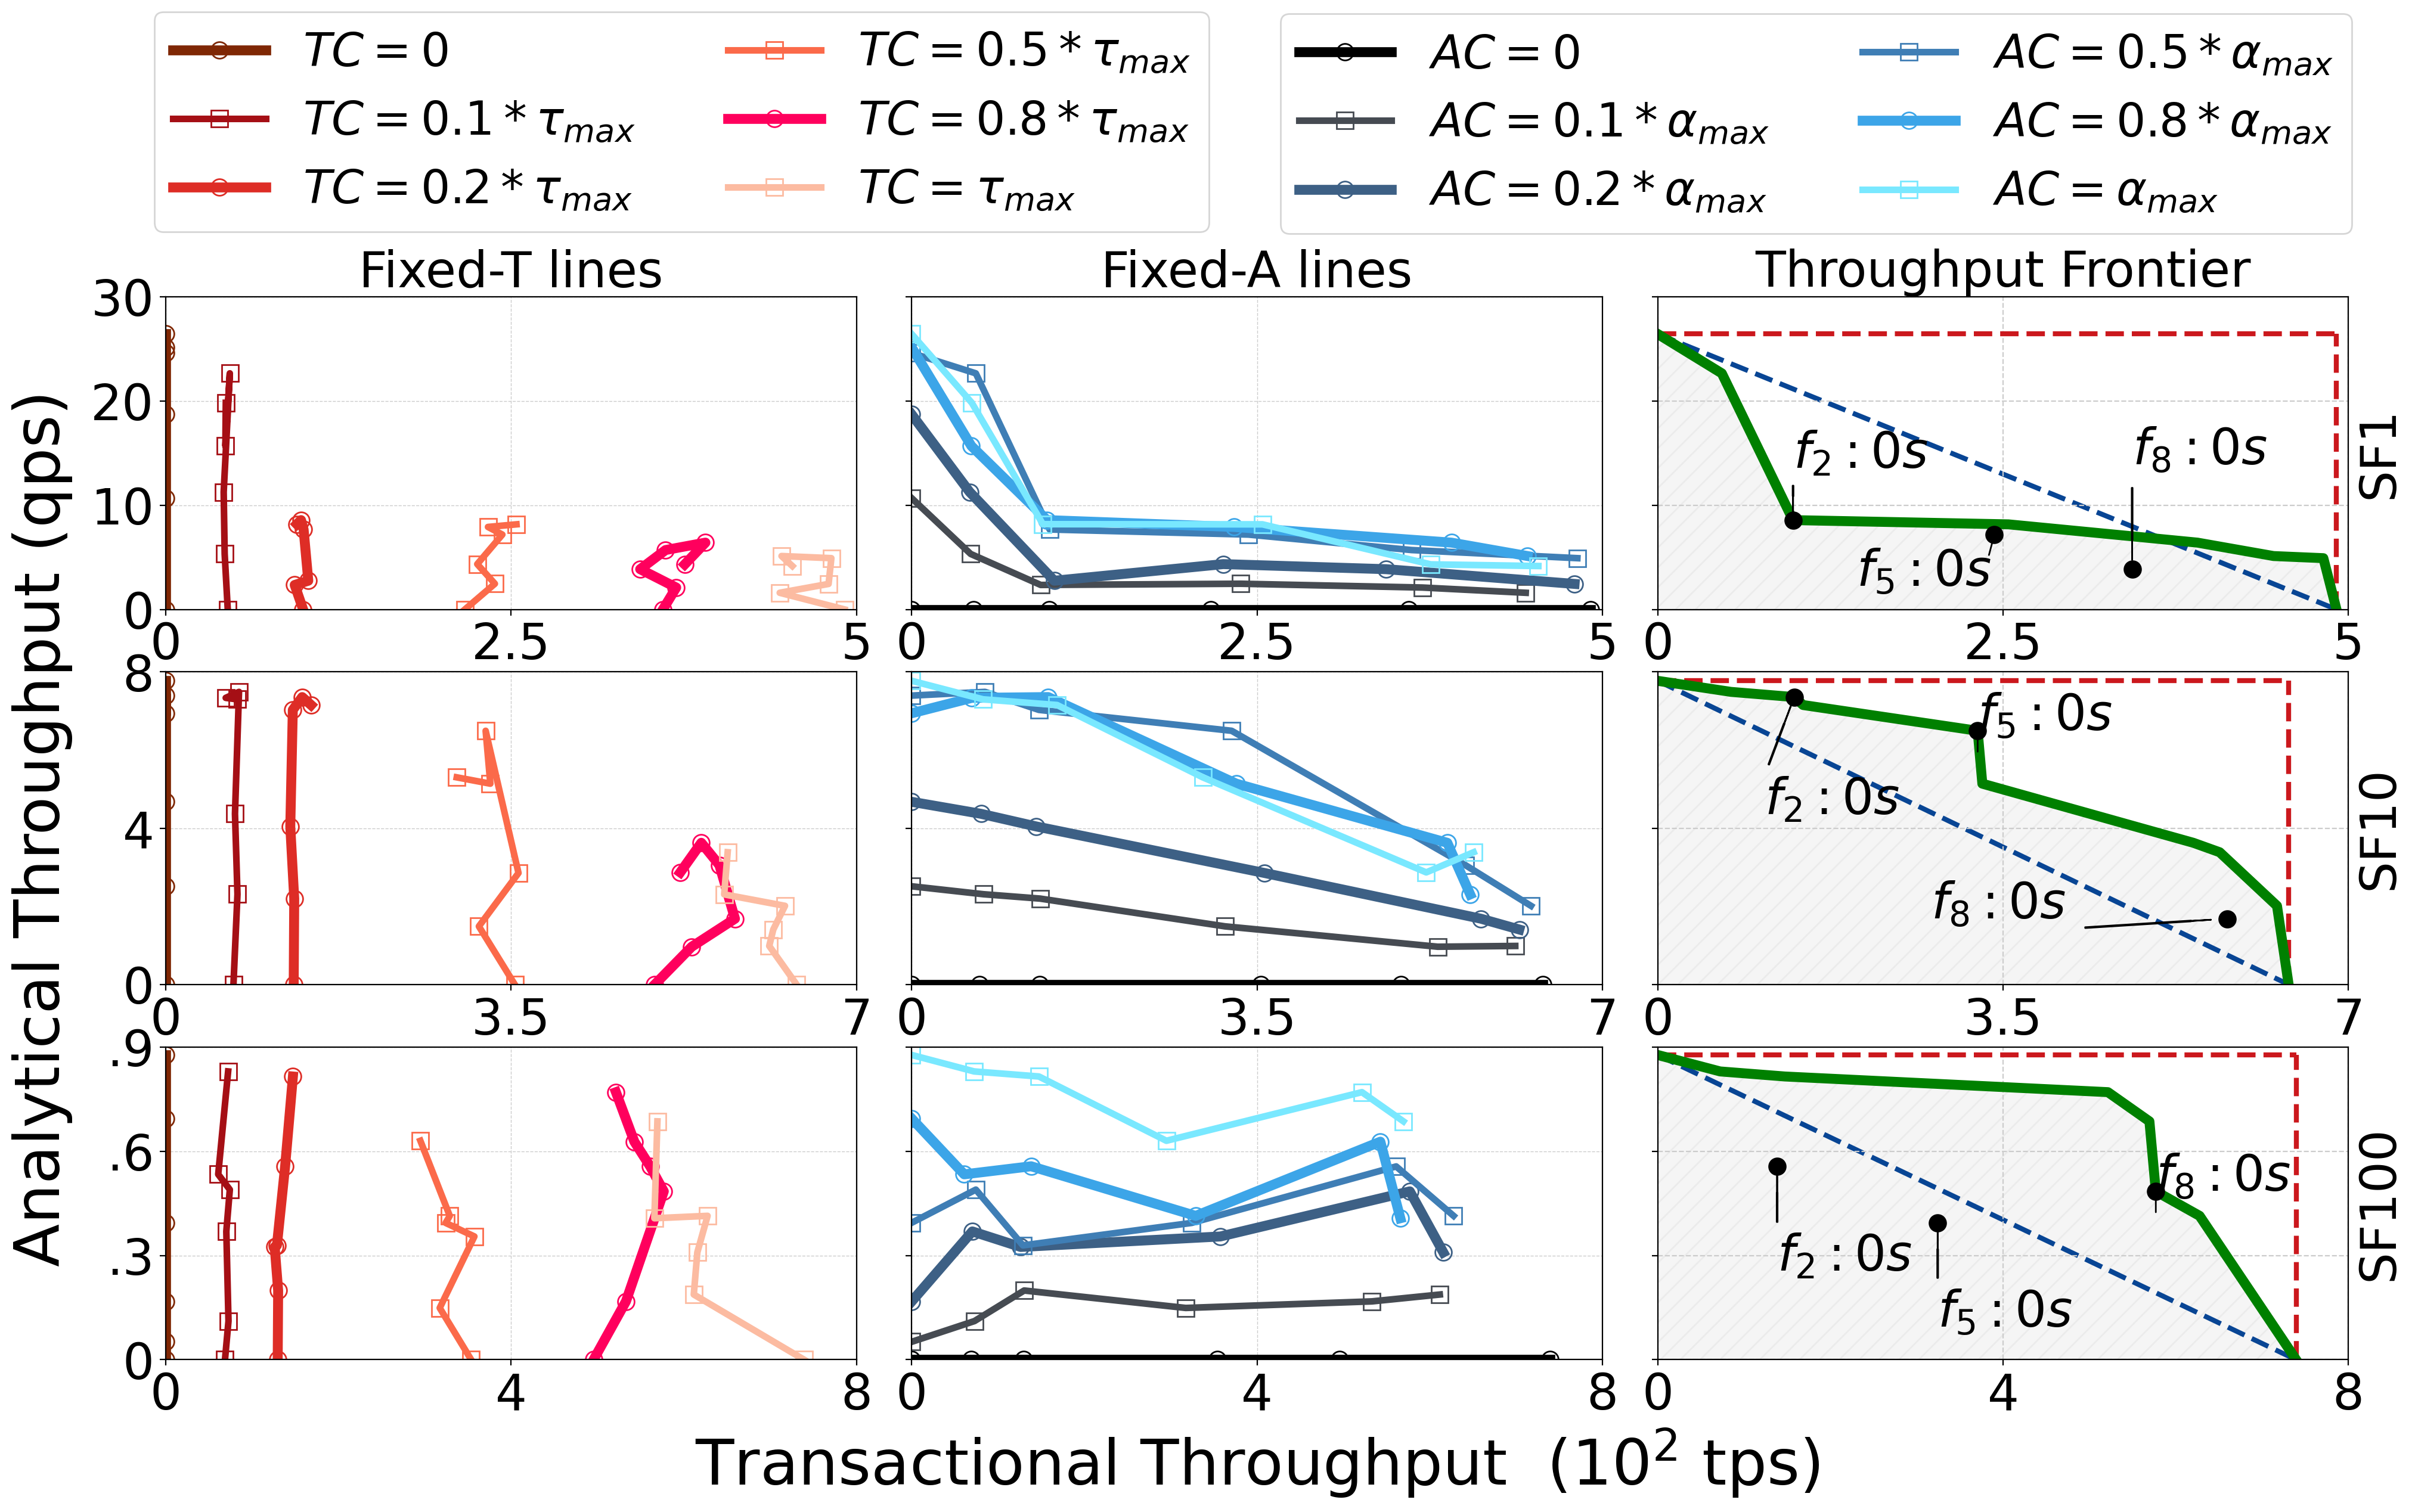

In [ ]:
cm = 1/2.54  # centimeters in inches
f, [(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)] = plt.subplots(3, 3, figsize=(60*cm,30*cm))
plt.subplots_adjust(wspace=0.08, hspace=0.2)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['text.usetex'] = True

# ------ SF1 -------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF1.csv')
ax1.axis([0,500, 0, 30])
ax2.axis([0,500, 0, 30])
ax3.axis([0,500, 0, 30])

x = [0, 250, 500]
xticks = ['0', '2.5', '5']
y = [0, 10, 20, 30]
yticks = ['',  '', '', '']
y2ticks = ['0', '10', '20', '30']

ax1.set_xticks(x, minor=False)
ax1.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax2.set_xticks(x, minor=False)
ax2.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax3.set_xticks(x, minor=False)
ax3.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax1.set_yticks(y, minor=False)
ax1.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax2.set_yticks(y, minor=False)
ax2.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax3.set_yticks(y, minor=False)
ax3.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax8.set_xlabel('Transactional Throughput  ($10^2$ tps)', fontsize=label_size)

ax1.set_title('Fixed-T lines', fontsize=sub_label_size)
ax2.set_title('Fixed-A lines', fontsize=sub_label_size)
ax3.set_title('Throughput Frontier', fontsize=sub_label_size)

#ax5.set_title('SF10')
#ax8.set_title('SF100')

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax1)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax2)
proportional_line(frontier, idx, ax3)
bounding_box(frontier, idx, ax3)
frontier_plot(frontier, idx, "", ax3, tc, ac, 0, 5, -100, -5, 0, 10, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)

# ------ SF10 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF10.csv')
ax4.axis([0,700, 0, 8])
ax5.axis([0,700, 0, 8])
ax6.axis([0,700, 0, 8])

x = [0, 350, 700]
xticks = ['0', '3.5', '7']
y = [0, 4, 8]
yticks = ['',  '', '']
y2ticks = ['0', '4', '8']


ax4.set_xticks(x, minor=False)
ax4.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax5.set_xticks(x, minor=False)
ax5.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax6.set_xticks(x, minor=False)
ax6.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)

ax4.set_yticks(y, minor=False)
ax4.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax5.set_yticks(y, minor=False)
ax5.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax6.set_yticks(y, minor=False)
ax6.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax4.set_ylabel('Analytical Throughput (qps)', fontsize=label_size, labelpad=30)

tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax4)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax5)
proportional_line(frontier, idx, ax6)
bounding_box(frontier, idx, ax6)
frontier_plot(frontier, idx, "", ax6, tc, ac, -30, -3, 0, 0, -300, 0, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)


# ------ SF100 ------
tt_v, ta_v, tt_h, ta_h, district_tc, frontier, idx  = preprocess(path+'frontier-SF100.csv')
ax7.axis([0,700, 0, 0.9])
ax8.axis([0,700, 0, 0.9])
ax9.axis([0,700, 0, 0.9])

x = [0, 400, 800]
xticks = ['0', '4', '8']
y = [0, 0.3, 0.6, 0.9]
yticks = ['',  '', '']
y2ticks = ['0', '.3', '.6', '.9']


ax7.set_xticks(x, minor=False)
ax7.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax8.set_xticks(x, minor=False)
ax8.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)
ax9.set_xticks(x, minor=False)
ax9.set_xticklabels(xticks, rotation=0, fontsize=xaxes_size)


ax7.set_yticks(y, minor=False)
ax7.set_yticklabels(y2ticks, rotation=0, fontsize=yaxes_size)
ax8.set_yticks(y, minor=False)
ax8.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)
ax9.set_yticks(y, minor=False)
ax9.set_yticklabels(yticks, rotation=0, fontsize=yaxes_size)

ax1.legend(loc='center left', bbox_to_anchor=(-0.05, 1.56),ncol=2, fontsize=legend_size ) 
ax2.legend(loc='upper left', bbox_to_anchor=(0.5,1.98),ncol=2, fontsize=legend_size )  

ax3.yaxis.set_label_position("right")
ax3.set_ylabel('SF1', fontsize=sub_label_size )
ax6.yaxis.set_label_position("right")
ax6.set_ylabel('SF10', fontsize=sub_label_size )
ax9.yaxis.set_label_position("right")
ax9.set_ylabel('SF100', fontsize=sub_label_size ) 
    
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
regular_plot(tt_h, ta_h, district_tc, "", clients, 1, ax8)
proportional_line(frontier, idx, ax9)
bounding_box(frontier, idx, ax9)
frontier_plot(frontier, idx, "", ax9, tc, ac, 0, -0.3, 0, -0.3, 0, 0, r"$f_2:0s$", r"$f_5:0s$", r"$f_8:0s$", 1)
f.savefig(path+'Plots/TiBD/tidb-dis.pdf', dpi=400, bbox_inches='tight')

# Freshness CDF

## 1. Postgres-Replication ON

In [ ]:
pathFile = path+"freshness-SF10-38-12.csv"
probFresh = np.genfromtxt(pathFile)
probFresh.sort()
freshness = probFresh*0.000000001
p1 = []
values1 = []
values1 = list(set(freshness))
values1.sort()
for i in range(len(values1)):
   s = sum(f <= values1[i] for f in freshness) 
   p1.append(s/len(freshness))

In [ ]:
import numpy as np
a = np.array(freshness)
p = np.percentile(a, 99) # return 50th percentile, e.g median.
print(p)

4.262984


In [ ]:
pathFile = path+"freshness-SF10-24-32.csv"
probFresh = np.genfromtxt(pathFile)
probFresh.sort()
freshness = probFresh*0.000000001
p2 = []
values2 = []
values2 = list(set(freshness))
values2.sort()
for i in range(len(values2)):
   s = sum(f <= values2[i] for f in freshness) 
   p2.append(s/len(freshness))

In [ ]:
import numpy as np
a = np.array(freshness)
p = np.percentile(a, 60) # return 50th percentile, e.g median.
print(p)

0.0006676080000000001


In [ ]:
pathFile = path+"freshness-SF10-9-51.csv"
probFresh = np.genfromtxt(pathFile)
probFresh.sort()
freshness = probFresh*0.000000001
p3 = []
values3 = []
values3 = list(set(freshness))
values3.sort()
for i in range(len(values3)):
   s = sum(f <= values3[i] for f in freshness) 
   p3.append(s/len(freshness))

In [ ]:
import numpy as np
a = np.array(freshness)
p = np.percentile(a, 90) # return 50th percentile, e.g median.
print(p)

0.1888480000000016


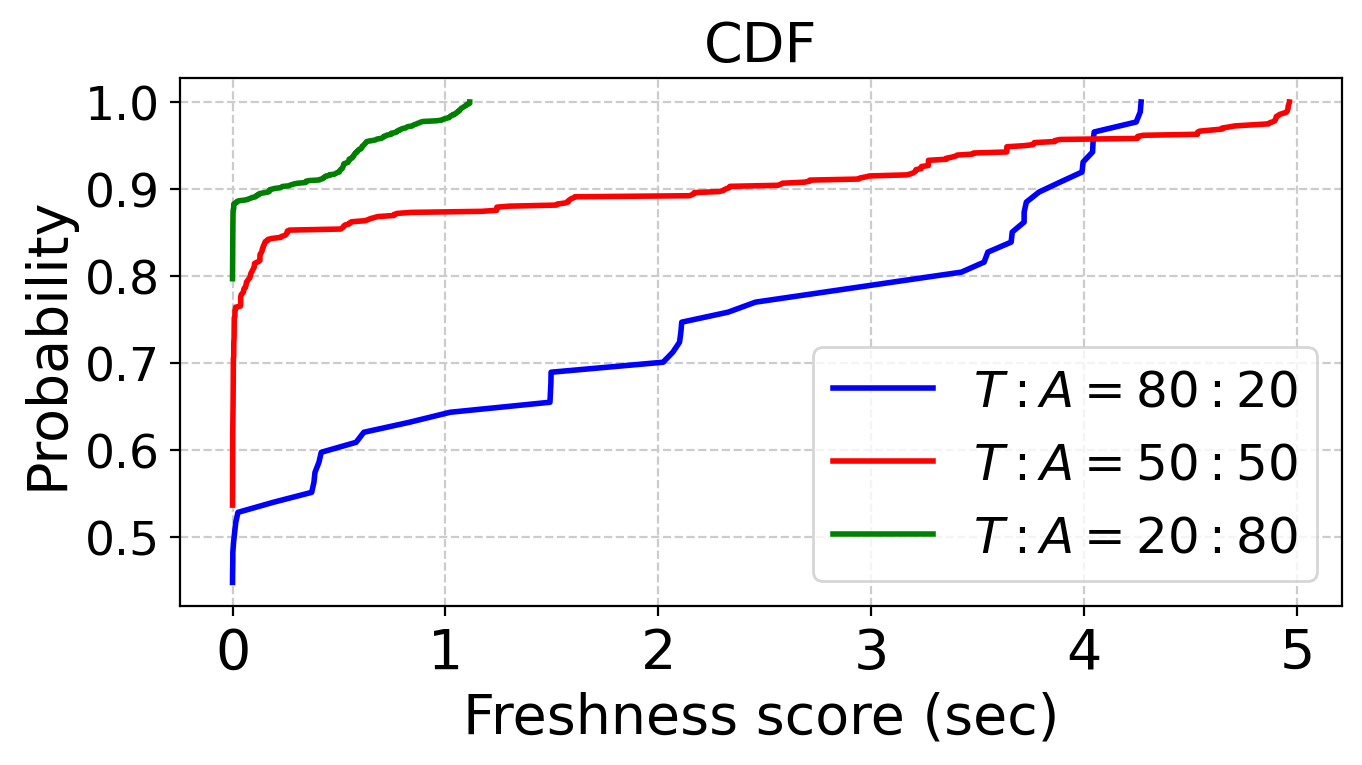

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['text.usetex'] = True


plt.plot(values1, p1, '-', linewidth=2,  label=r'$T:A=80:20$', c='blue')

plt.plot(values2, p2, '-', linewidth=2, label=r'$T:A=50:50$', c='red')

plt.plot(values3, p3, '-', linewidth=2, label=r'$T:A=20:80$', c='green')

plt.xticks(fontsize=20)
plt.yticks(fontsize=17)
plt.grid(color='#CCCCCC', linestyle='--', linewidth=0.8, zorder=1)

plt.ylabel('Probability', fontsize=20)
plt.xlabel('Freshness score (sec)', fontsize=20)
plt.rc('grid', linestyle="--", color='#CCCCCC')
plt.title("CDF", fontsize=20)
plt.legend(loc="lower right",  fontsize=18)
plt.savefig(path+'Plots/cdf1.pdf', dpi=400, bbox_inches='tight')

# Across Systems 

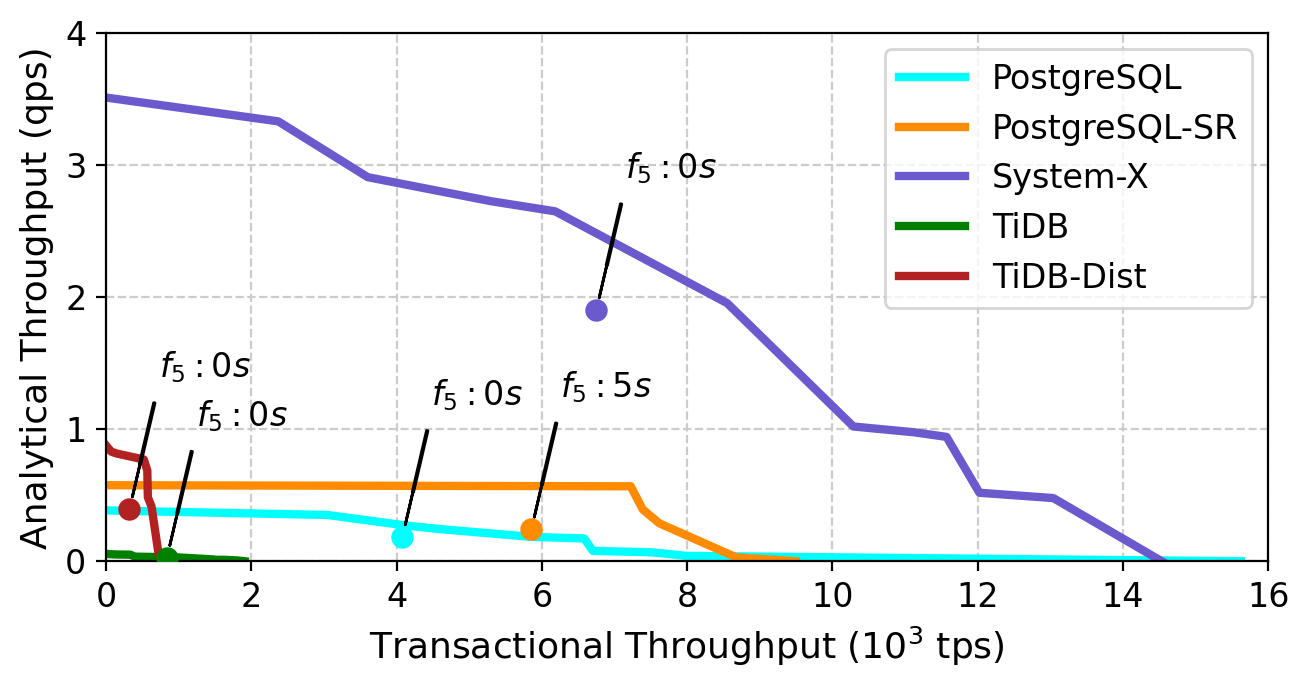

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.5, 3.5]
#plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['text.usetex'] = True

plt.axis([0,16000, 0, 4])

x = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
xticks = ['0', '2', '4', '6', '8', '10', '12', '14', '16']
y = [0, 1, 2, 3, 4]
yticks = ['', '', '', '', '']
y2ticks = ['0', '1', '2', '3', '4']

tt_v, ta_v, tt_h, ta_h, district_tc, frontier1, idx1  = preprocess(path+'postgres-frontier-SF100.csv')
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
plt.scatter(tc[1], ac[1], marker="o", s=50, color='cyan',zorder=3)
arrow_properties = dict(
facecolor="black", width=0.5,
headwidth=0, shrink=0.1)
plt.annotate(r'$f_5:0s$', (tc[1], ac[1]), xytext =(tc[1]+400, ac[1]+1), color='#000000', size=12, weight='bold', arrowprops=arrow_properties)

tt_v, ta_v, tt_h, ta_h, district_tc, frontier2, idx2  = preprocess(path+'postgres-sr-frontier-SF100.csv')
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
plt.scatter(tc[1], ac[1], marker="o", s=50, color='darkorange',zorder=3)
arrow_properties = dict(
facecolor="black", width=0.5,
headwidth=0, shrink=0.1)
plt.annotate(r'$f_5:5s$', (tc[1], ac[1]), xytext =(tc[1]+400, ac[1]+1), color='#000000', size=12, weight='bold', arrowprops=arrow_properties)

tt_v, ta_v, tt_h, ta_h, district_tc, frontier3, idx3  = preprocess(path+'systemx-frontier-SF100.csv')
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
plt.scatter(tc[1], ac[1], marker="o", s=50, color='slateblue',zorder=3)
arrow_properties = dict(
facecolor="black", width=0.5,
headwidth=0, shrink=0.1)
plt.annotate(r'$f_5:0s$', (tc[1], ac[1]), xytext =(tc[1]+400, ac[1]+1), color='#000000', size=12, weight='bold', arrowprops=arrow_properties)

tt_v, ta_v, tt_h, ta_h, district_tc, frontier4, idx4  = preprocess(path+'tidb-frontier-SF100.csv')
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
plt.scatter(tc[1], ac[1], marker="o", s=50, color='green',zorder=3)
arrow_properties = dict(
facecolor="black", width=0.5,
headwidth=0, shrink=0.1)
plt.annotate(r'$f_5:0s$', (tc[1], ac[1]), xytext =(tc[1]+400, ac[1]+1), color='#000000', size=12, weight='bold', arrowprops=arrow_properties)

tt_v, ta_v, tt_h, ta_h, district_tc, frontier5, idx5  = preprocess(path+'tidb-dist-frontier-SF100.csv')
tc, ac = regular_plot(tt_v, ta_v, district_tc, "", clients, 0, ax7)
plt.scatter(tc[1], ac[1], marker="o", s=50, color='firebrick',zorder=3)
arrow_properties = dict(
facecolor="black", width=0.5,
headwidth=0, shrink=0.1)
plt.annotate(r'$f_5:0s$', (tc[1], ac[1]), xytext =(tc[1]+400, ac[1]+1), color='#000000', size=12, weight='bold', arrowprops=arrow_properties)


plt.xticks(x, xticks, fontsize=12)
plt.yticks(y,y2ticks, fontsize=12)

plt.plot(frontier1[0][idx1], frontier1[1][idx1], '-', linewidth=3.0, label='PostgreSQL', color='cyan')
plt.plot(frontier2[0][idx2], frontier2[1][idx2], '-', linewidth=3.0, label='PostgreSQL-SR', color='darkorange')
plt.plot(frontier3[0][idx3], frontier3[1][idx3], '-', linewidth=3.0, label='System-X', color='slateblue')
plt.plot(frontier4[0][idx4], frontier4[1][idx4], '-', linewidth=3.0, label='TiDB', color='green')
plt.plot(frontier5[0][idx5], frontier5[1][idx5], '-', linewidth=3.0, label='TiDB-Dist', color='firebrick')

plt.xlabel('Transactional Throughput ($10^3$ tps)', fontsize=13)
plt.ylabel('Analytical Throughput (qps)', fontsize=13)
plt.rc('grid', linestyle="--", color='#CCCCCC')
plt.legend(loc="upper right", fontsize=12) # bbox_to_anchor=(1.05, 1.2), ncol=5)
plt.grid()
plt.savefig(path+'/results-revision/Plots/across.pdf', dpi=400, bbox_inches='tight')
plt.show()